In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('seaborn-darkgrid') # Set Plotting Aesthetic Defaults
%matplotlib inline

df = pd.read_csv('train_2016_v2.csv')

In [2]:
df = df.loc[:, ['transactiondate','logerror']]
df.transactiondate = pd.to_datetime(df.transactiondate)

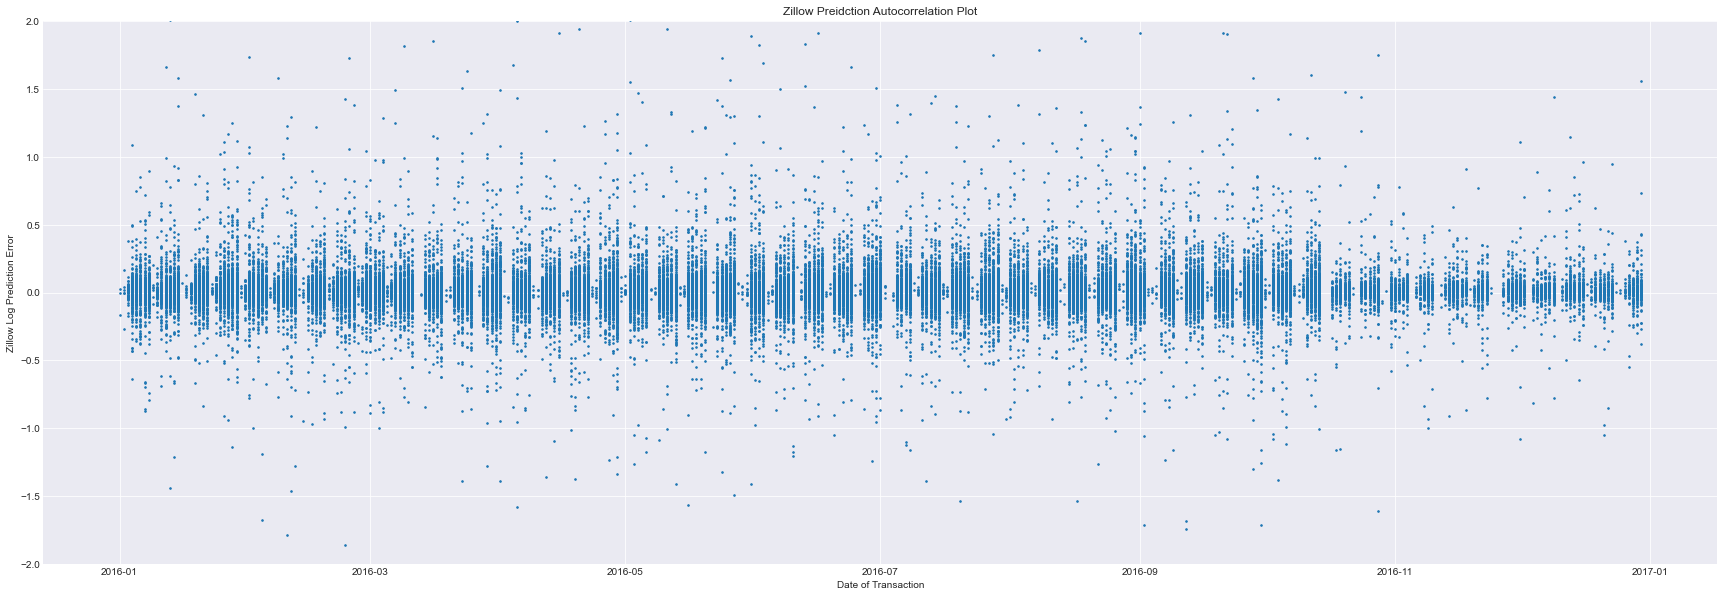

In [3]:
plt.figure(figsize=(30, 10))
plt.scatter(df.transactiondate, df.logerror, s = 2.5)
plt.ylabel('Zillow Log Prediction Error')
plt.xlabel('Date of Transaction')

plt.title('Zillow Preidction Autocorrelation Plot')

plt.ylim([-2,2])

plt.show()

In [4]:
agg_df = df.groupby(by = df.transactiondate.dt.month).agg(['std','count'])
agg_df.columns = agg_df.columns.to_flat_index() 
agg_df.columns = ['std','n']
agg_df['se'] = agg_df.loc[:,'std']/np.sqrt(agg_df.n)
agg_df

,std,n,se
transactiondate,,,
1,0.171525,6556,0.002118
2,0.198599,6333,0.002496
3,0.172171,8652,0.001851
4,0.166560,9311,0.001726
5,0.150861,9961,0.001512
6,0.151433,10922,0.001449
7,0.151663,9947,0.001521
8,0.161429,10476,0.001577
9,0.150357,9575,0.001537
